# Hyperparameter Tuning


In [1]:
import numpy as np

from data import load_data

train_data, test_data = load_data()

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib
import os


def tune(p_num, tuner, X, y):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Skipping...')
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X, y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.0628857680434464
RMSE: 0.0628857680434464
R2 Score: 0.9754066081647914


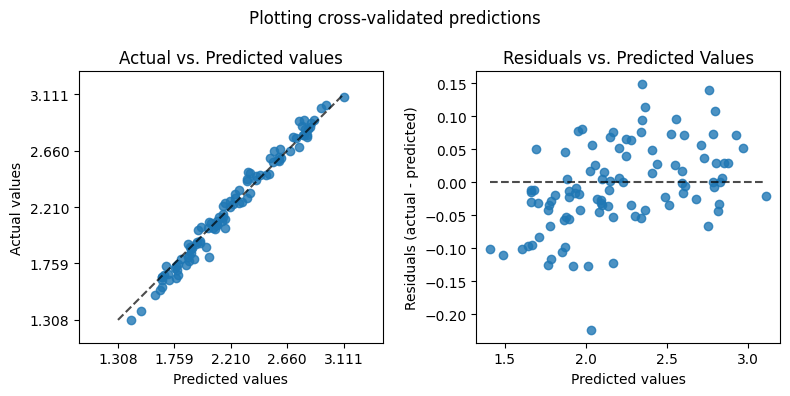

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 10),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.08412386806041779
RMSE: 0.08412386806041779
R2 Score: 0.9139085080430925


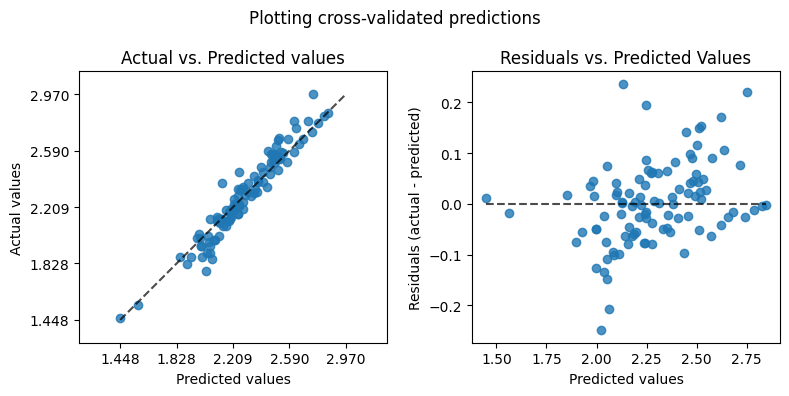

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 14),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.09159948127588868
RMSE: 0.09159948127588868
R2 Score: 0.8731502495264254


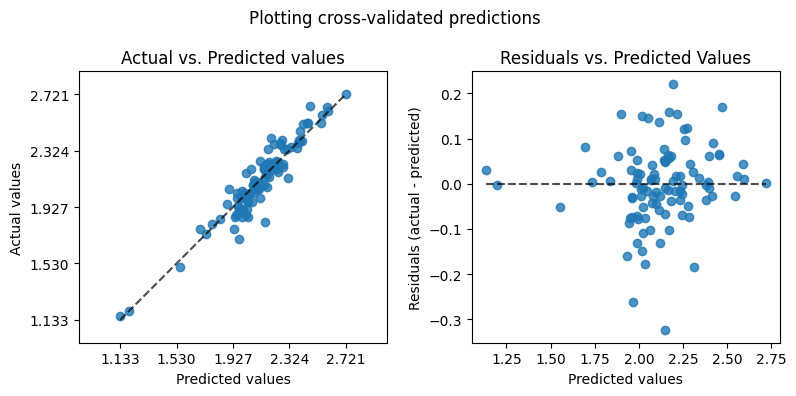

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 15),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.09412789691662561
RMSE: 0.09412789691662561
R2 Score: 0.9233419466141228


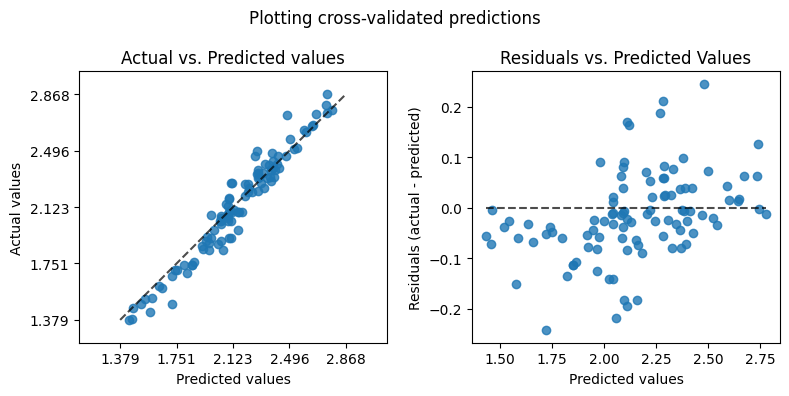

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 12),
             ('max_iter', 445),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.05880253327432286
RMSE: 0.05880253327432286
R2 Score: 0.9745163088126199


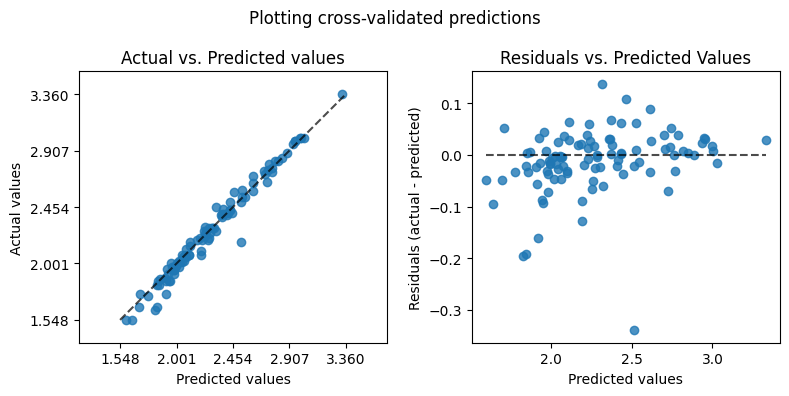

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.08467215688865157),
             ('learning_rate', 0.18940691804979),
             ('max_bins', 246),
             ('max_depth', 8),
             ('max_iter', 488),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 23),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.06613945312016196
RMSE: 0.06613945312016196
R2 Score: 0.9036577356697952


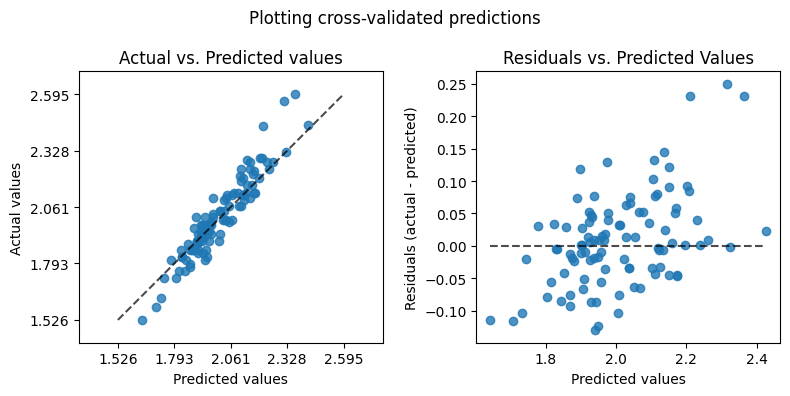

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.07418134392750388
RMSE: 0.07418134392750388
R2 Score: 0.9306736911609276


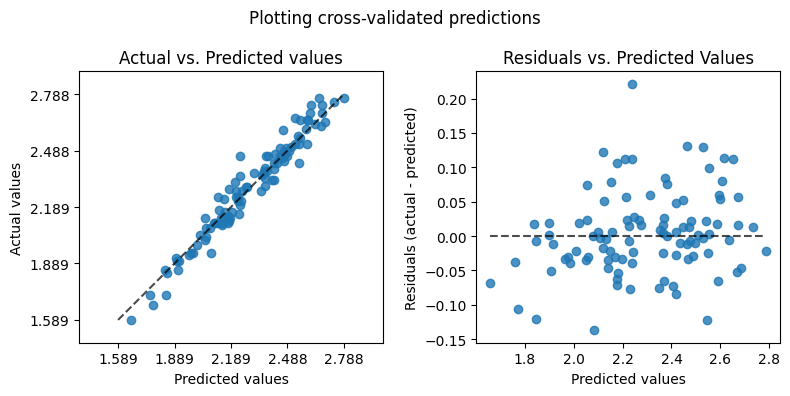

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.7158790215974129),
             ('learning_rate', 0.18720792049869872),
             ('max_bins', 220),
             ('max_depth', 14),
             ('max_iter', 330),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 24),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.08498877642910868
RMSE: 0.08498877642910868
R2 Score: 0.9184323508523313


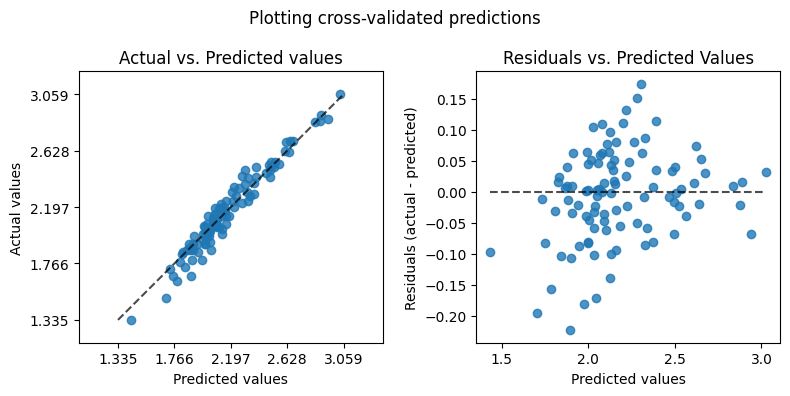

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.2),
             ('max_bins', 255),
             ('max_depth', 14),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.029085882265983003
RMSE: 0.029085882265983003
R2 Score: 0.9906922454509001


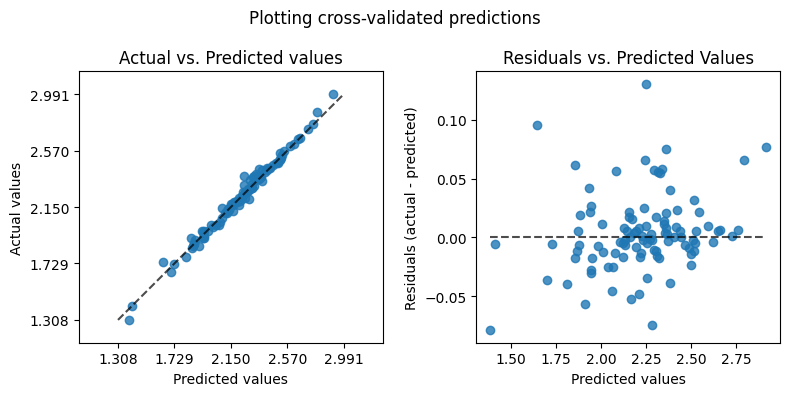

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 403),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.016474030005907227
RMSE: 0.016474030005907227
R2 Score: 0.9935230352168454


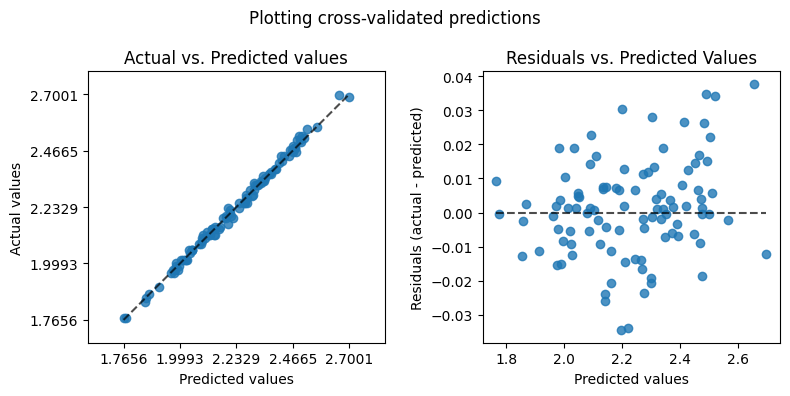

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 9),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.019154495011381827
RMSE: 0.019154495011381827
R2 Score: 0.9971500543719064


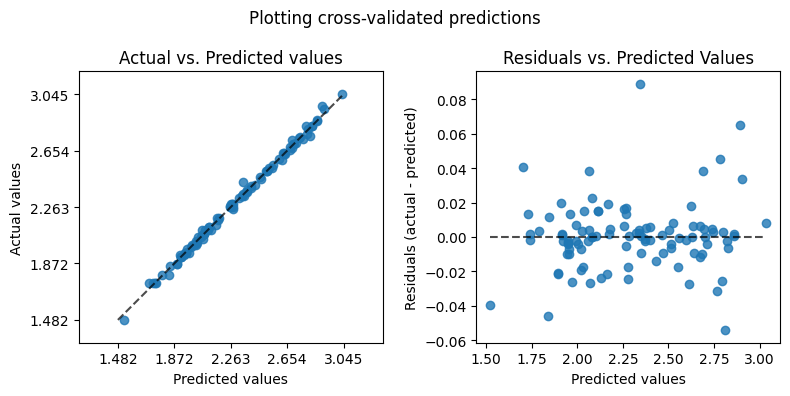

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 50),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.017261576132435952
RMSE: 0.017261576132435952
R2 Score: 0.996078527315029


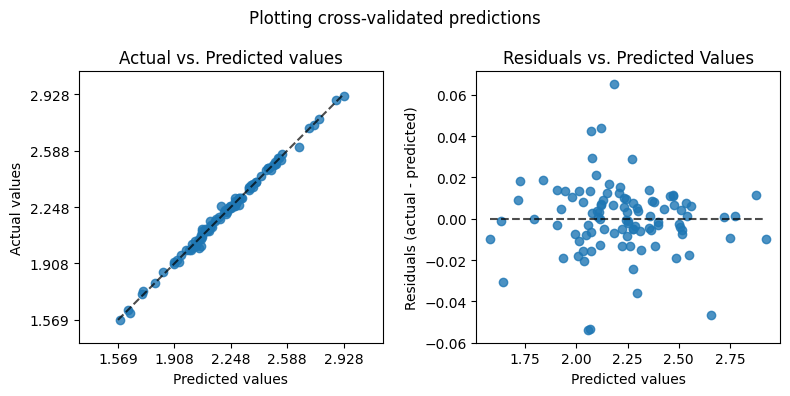

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.2),
             ('max_bins', 128),
             ('max_depth', 15),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.015805537084499416
RMSE: 0.015805537084499416
R2 Score: 0.9980722526838538


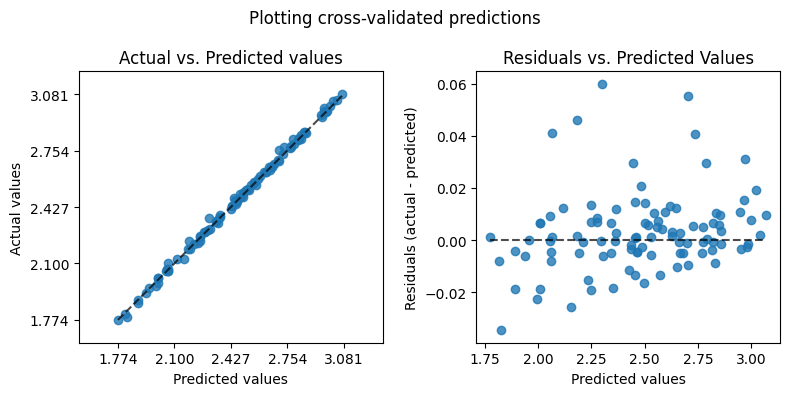

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 1e-05),
             ('learning_rate', 0.12416651220807236),
             ('max_bins', 128),
             ('max_depth', 12),
             ('max_iter', 500),
             ('max_leaf_nodes', 31),
             ('min_samples_leaf', 10),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.025852411997915388
RMSE: 0.025852411997915388
R2 Score: 0.9928630902433995


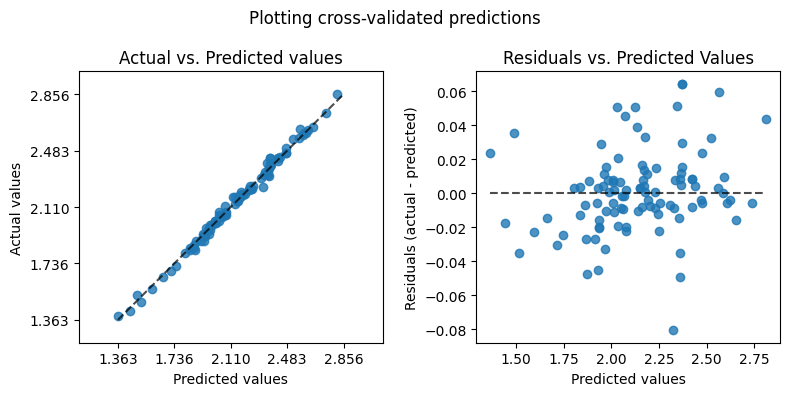

-----------HistGradientBoostingRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('early_stopping', False),
             ('l2_regularization', 0.00014408586793222098),
             ('learning_rate', 0.0993731963816402),
             ('max_bins', 141),
             ('max_depth', 9),
             ('max_iter', 497),
             ('max_leaf_nodes', 30),
             ('min_samples_leaf', 21),
             ('scoring', 'neg_mean_squared_error')])

RMSE: 0.04328065748762999
RMSE: 0.04328065748762999
R2 Score: 0.9725443669403283


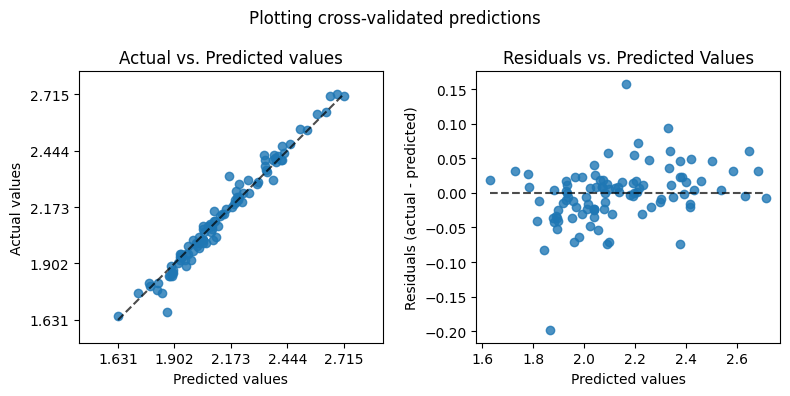

In [3]:
from pipelines import pipeline
from src.features.tuners import HistGradientBoostingHyperparameterTuner

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']
    y_train_log = np.log1p(y_train)

    tune(patient, HistGradientBoostingHyperparameterTuner(search_space='deep'), X_train, y_train_log)